# Capítulo 6: Diagnóstico de supuestos

In [1]:
from pathlib import Path
DATA_PATH = Path("../data/AmesHousing_codificada.csv")  # relativo a book/notebooks/
assert DATA_PATH.is_file(), "No se encontró '../data/AmesHousing_codificada.csv'"
print("Usando CSV:", DATA_PATH.resolve())

Usando CSV: /workspaces/ames-housing-project/book/data/AmesHousing_codificada.csv


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
data_modelo_final = pd.read_csv(DATA_PATH)

data_modelo_final = data_modelo_final[['SalePrice','Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','Year Built','Year Remod/Add','Full Bath','Garage Yr Blt','TotRms AbvGrd','Fireplaces','Mas Vnr Area','BsmtFin SF 1']]

# Separar variable dependiente e independientes
X = data_modelo_final[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Year Built','Total Bsmt SF','Year Remod/Add','1st Flr SF','Full Bath','Garage Yr Blt','Fireplaces','TotRms AbvGrd']]
y = data_modelo_final[['SalePrice']]

# Agregar la constante (intercepto)
X = sm.add_constant(X)

# Crear el modelo_final
modelo_final = sm.OLS(y, X)

# Ajustar (fit)
resultados = modelo_final.fit()

# Imprimir resumen
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1255.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        04:12:14   Log-Likelihood:                -32098.
No. Observations:                2768   AIC:                         6.422e+04
Df Residuals:                    2755   BIC:                         6.430e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.388e+06   6.77e+04    -20.

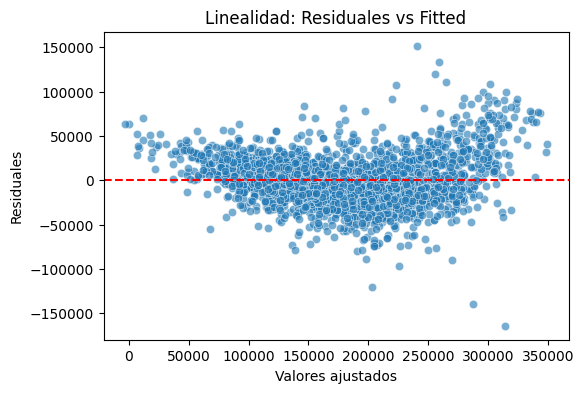


🟩 Homocedasticidad:
Breusch–Pagan p-value: 0.0000
White p-value: 0.0000
⚠️ Posible heterocedasticidad detectada.


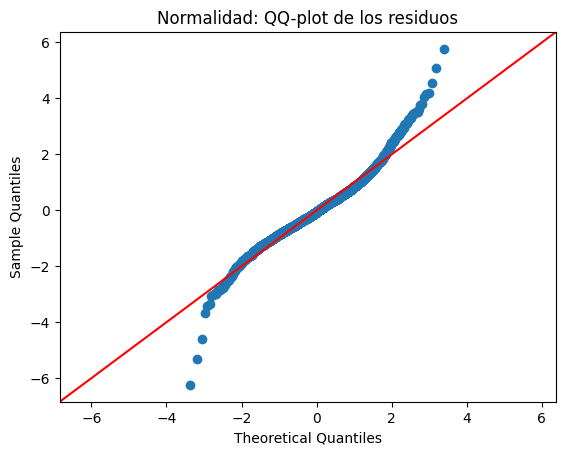


🟩 Normalidad:
Shapiro-Wilk p-value: 0.0000
⚠️ Los residuos no son perfectamente normales.

🟩 Autocorrelación:
Durbin–Watson: 1.59
✅ No hay autocorrelación significativa.



🟩 Multicolinealidad (VIF):
          Variable           VIF
0            const  18276.768957
1     Overall Qual      2.676051
2      Gr Liv Area      4.561283
3      Garage Cars      5.686113
4      Garage Area      5.260232
5       Year Built      3.538977
6    Total Bsmt SF      3.065366
7   Year Remod/Add      1.965601
8       1st Flr SF      3.061355
9        Full Bath      2.208047
10   Garage Yr Blt      3.141189
11      Fireplaces      1.359936
12   TotRms AbvGrd      2.970047

✅ VIF < 5 indica multicolinealidad aceptable.

📋 Resumen esperado:
| Supuesto          | Método                | Criterio esperado                     |
|:------------------|:----------------------|:--------------------------------------|
| Linealidad        | Residual vs Fitted    | Distribución aleatoria alrededor de 0 |
| Homocedasticidad  | Breusch–Pagan / White | p > 0.05 → ok                         |
| Normalidad        | QQ-plot / Shapiro     | Puntos ~ línea / p > 0.05 → ok        |
| Autocorrel

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# === 1️⃣ Linealidad ===
plt.figure(figsize=(6,4))
sns.scatterplot(x=resultados.fittedvalues, y=resultados.resid, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Linealidad: Residuales vs Fitted")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuales")
plt.show()

# === 2️⃣ Homocedasticidad ===
bp_test = sms.het_breuschpagan(resultados.resid, resultados.model.exog)
white_test = sms.het_white(resultados.resid, resultados.model.exog)

bp_pvalue = bp_test[1]
white_pvalue = white_test[1]

print("\n🟩 Homocedasticidad:")
print(f"Breusch–Pagan p-value: {bp_pvalue:.4f}")
print(f"White p-value: {white_pvalue:.4f}")
if bp_pvalue > 0.05 and white_pvalue > 0.05:
    print("✅ No hay evidencia de heterocedasticidad.")
else:
    print("⚠️ Posible heterocedasticidad detectada.")

# === 3️⃣ Normalidad ===
sm.qqplot(resultados.resid, line="45", fit=True)
plt.title("Normalidad: QQ-plot de los residuos")
plt.show()

shapiro_test = stats.shapiro(resultados.resid)
print("\n🟩 Normalidad:")
print(f"Shapiro-Wilk p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print("✅ Los residuos parecen normales.")
else:
    print("⚠️ Los residuos no son perfectamente normales.")

# === 4️⃣ Autocorrelación ===
dw = sm.stats.stattools.durbin_watson(resultados.resid)
print("\n🟩 Autocorrelación:")
print(f"Durbin–Watson: {dw:.2f}")
if 1.5 < dw < 2.5:
    print("✅ No hay autocorrelación significativa.")
else:
    print("⚠️ Posible autocorrelación en los residuos.")

# === 5️⃣ Multicolinealidad ===
vif_data = pd.DataFrame()
vif_data["Variable"] = resultados.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(resultados.model.exog, i) for i in range(resultados.model.exog.shape[1])]

print("\n🟩 Multicolinealidad (VIF):")
print(vif_data)
print("\n✅ VIF < 5 indica multicolinealidad aceptable.")

# === 6️⃣ Resumen interpretativo ===
resumen = pd.DataFrame({
    "Supuesto": ["Linealidad", "Homocedasticidad", "Normalidad", "Autocorrelación", "Multicolinealidad"],
    "Método": ["Residual vs Fitted", "Breusch–Pagan / White", "QQ-plot / Shapiro", "Durbin–Watson", "VIF"],
    "Criterio esperado": [
        "Distribución aleatoria alrededor de 0",
        "p > 0.05 → ok",
        "Puntos ~ línea / p > 0.05 → ok",
        "~2 → ok",
        "<5 → aceptable"
    ]
})
print("\n📋 Resumen esperado:")
print(resumen.to_markdown(index=False))

## Takeaways
Síntesis de aprendizajes y decisiones reproducibles del notebook:

- MyST/Jupytext requiere el encabezado YAML al inicio del archivo.
- Todas las celdas ejecutables usan bloques ```{code-cell} ipython3``` en la columna 0.
- Definimos `DATA_PATH` una sola vez y unificamos el nombre del CSV a `ames_housing_clean.csv`.
- Evitamos rutas absolutas (p. ej., `/workspaces/...`) para compatibilidad con Codespaces y GitHub Pages.
- Mensajes narrativos con `print()` fueron pasados a Markdown fuera de cajita.